# ТЗ к Лабораторной работе №4:

1. Найти оптимум функциии с помощью Optuna
2. Осуществить подбор параметров модели классификации с помощью Optuna

#0. Импорт библиотек и вспомогательные функции

In [3]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import logging
import sys
import math
import optuna
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as cm
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [5]:
def my_plot_function(f, title: str, _x, _y, _z):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, alpha = 0.8)
  ax.scatter(_x, _y, _z, linewidths  = 8 , color='m', alpha = 1,
             label = 'Глобальный минимум')
  ax.legend(fontsize=10, loc='lower left' )
  ax.view_init(40, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)

#1. Поиск оптимумов функциий Матьяса и трехгорбого верблюда с помощью Optuna

In [6]:
def Matias(x: np.array, y:np.array) -> np.float128:
  return 0.26*(x*x + y*y) - 0.48*x*y
  
def Camel(x: np.array, y:np.array) -> np.float64:
  return 2 * x ** 2 - 1.05 * x ** 4 + 1/6 * x ** 6 + x * y + y ** 2

In [19]:
def objective_Matias(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Matias(x, y)
study = optuna.create_study()
study.optimize(objective_Matias, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]

[I 2022-11-04 16:17:49,439] A new study created in memory with name: no-name-fbe6ab02-1417-49a0-b457-d8bcd6375c8b
[I 2022-11-04 16:17:49,445] Trial 0 finished with value: 2.901982861901754 and parameters: {'x': -7.428050374012747, 'y': -8.588525727759187}. Best is trial 0 with value: 2.901982861901754.
[I 2022-11-04 16:17:49,449] Trial 1 finished with value: 13.356197457269854 and parameters: {'x': -7.957167257167088, 'y': -0.8640557527976434}. Best is trial 0 with value: 2.901982861901754.
[I 2022-11-04 16:17:49,453] Trial 2 finished with value: 13.718640522464504 and parameters: {'x': -6.262173736994643, 'y': 1.072487001818537}. Best is trial 0 with value: 2.901982861901754.
[I 2022-11-04 16:17:49,458] Trial 3 finished with value: 9.016130603469446 and parameters: {'x': -0.5551302229481294, 'y': -6.397310070612587}. Best is trial 0 with value: 2.901982861901754.
[I 2022-11-04 16:17:49,462] Trial 4 finished with value: 29.061750046920537 and parameters: {'x': 6.940330066444108, 'y': -

Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z =  0.16610015943053963 0.16610015943053963 0.0011035705185140302


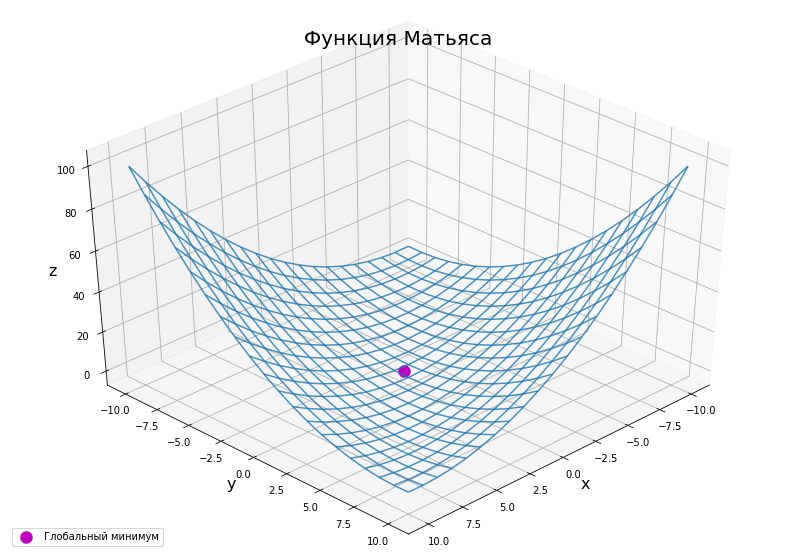

In [8]:
found_z = Matias(found_x, found_x)
print("Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z = ",
      found_x, found_x, found_z)
my_plot_function(Matias, "Функция Матьяса", found_x, found_y, found_z )

In [17]:
def objective_Camel(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Camel(x, y)
study = optuna.create_study()
study.optimize(objective_Camel, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]

[I 2022-11-04 16:17:22,972] A new study created in memory with name: no-name-c9055143-6162-4b02-81ec-bb7a0028a6fe
[I 2022-11-04 16:17:22,981] Trial 0 finished with value: 1171.2124836673595 and parameters: {'x': 4.614769409370108, 'y': -2.963141796764967}. Best is trial 0 with value: 1171.2124836673595.
[I 2022-11-04 16:17:22,984] Trial 1 finished with value: 7007.436316283717 and parameters: {'x': -6.073717044249278, 'y': 0.8744978784239148}. Best is trial 0 with value: 1171.2124836673595.
[I 2022-11-04 16:17:23,001] Trial 2 finished with value: 94.88518361105987 and parameters: {'x': 2.6889280149615296, 'y': -9.954118038206662}. Best is trial 2 with value: 94.88518361105987.
[I 2022-11-04 16:17:23,013] Trial 3 finished with value: 117.27963239567009 and parameters: {'x': -3.3239980533400493, 'y': 0.5136491635914204}. Best is trial 2 with value: 94.88518361105987.
[I 2022-11-04 16:17:23,019] Trial 4 finished with value: 379.03929927516185 and parameters: {'x': -3.8727356195900065, 'y'

Результат работы Opruna для поиска оптимума функции трехгорбого верблюда: x, y, z =  -1.6635213339343387 -1.6635213339343387 6.560333604413943


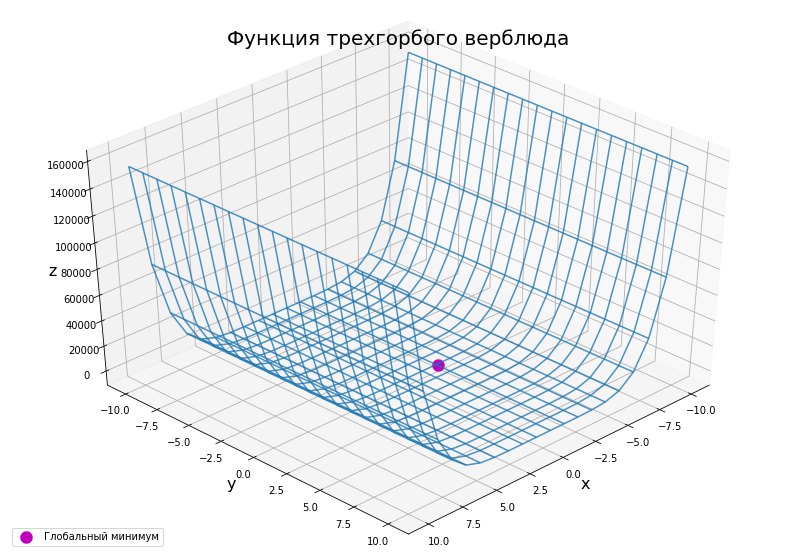

In [10]:
print("Результат работы Opruna для поиска оптимума функции трехгорбого верблюда: x, y, z = ",
      found_x, found_x, Camel(found_x, found_x))
my_plot_function(Camel, "Функция трехгорбого верблюда", found_x, found_y, found_z)

#2. Подбор параметров модели классификации LogisticRegression с помощью Optuna на датасете sklearn.datasets.load_wine

In [20]:
X, y = load_wine(return_X_y=True)
train_x, valid_x, train_y, valid_y = train_test_split(X, y)

def objective(trial):
  C = trial.suggest_float("C", 1e-5, 1, log=True)
  tol = trial.suggest_float("tol", 1e-1, 10, log=True)
  solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear",
                                                "sag", "saga"])
  clf = LogisticRegression(C=C, tol=tol, solver=solver)
  for step in range(100):
    clf.fit(train_x, train_y)
    intermediate_value = clf.score(valid_x, valid_y)
    trial.report(intermediate_value, step=step)
    if trial.should_prune():
      raise optuna.TrialPruned()
    return clf.score(valid_x, valid_y)

optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
study.optimize(objective, n_trials=30)

[I 2022-11-04 16:18:10,374] A new study created in memory with name: no-name-92b5aced-4620-4486-981b-885f45611b80


A new study created in memory with name: no-name-92b5aced-4620-4486-981b-885f45611b80


[I 2022-11-04 16:18:10,384] Trial 0 finished with value: 0.6444444444444445 and parameters: {'C': 0.0005981938071586235, 'tol': 0.22745502158421513, 'solver': 'sag'}. Best is trial 0 with value: 0.6444444444444445.


Trial 0 finished with value: 0.6444444444444445 and parameters: {'C': 0.0005981938071586235, 'tol': 0.22745502158421513, 'solver': 'sag'}. Best is trial 0 with value: 0.6444444444444445.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[I 2022-11-04 16:18:10,425] Trial 1 finished with value: 0.7555555555555555 and parameters: {'C': 0.0004307946638714197, 'tol': 0.5374731503745472, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6444444444444445.


Trial 1 finished with value: 0.7555555555555555 and parameters: {'C': 0.0004307946638714197, 'tol': 0.5374731503745472, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.6444444444444445.


[I 2022-11-04 16:18:10,509] Trial 2 finished with value: 0.7555555555555555 and parameters: {'C': 2.951201693061255e-05, 'tol': 0.47407856984033364, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.6444444444444445.


Trial 2 finished with value: 0.7555555555555555 and parameters: {'C': 2.951201693061255e-05, 'tol': 0.47407856984033364, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.6444444444444445.


[I 2022-11-04 16:18:10,522] Trial 3 finished with value: 0.3111111111111111 and parameters: {'C': 0.23465673320056968, 'tol': 9.1962646607475, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 3 finished with value: 0.3111111111111111 and parameters: {'C': 0.23465673320056968, 'tol': 9.1962646607475, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,542] Trial 4 finished with value: 0.6222222222222222 and parameters: {'C': 0.0005403290596065591, 'tol': 0.7152633763691985, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


Trial 4 finished with value: 0.6222222222222222 and parameters: {'C': 0.0005403290596065591, 'tol': 0.7152633763691985, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[I 2022-11-04 16:18:10,585] Trial 5 finished with value: 0.7777777777777778 and parameters: {'C': 0.00045413730464061354, 'tol': 0.13743171946060323, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.3111111111111111.


Trial 5 finished with value: 0.7777777777777778 and parameters: {'C': 0.00045413730464061354, 'tol': 0.13743171946060323, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,596] Trial 6 finished with value: 0.5333333333333333 and parameters: {'C': 0.0018024109604252183, 'tol': 0.573808421619348, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 6 finished with value: 0.5333333333333333 and parameters: {'C': 0.0018024109604252183, 'tol': 0.573808421619348, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,604] Trial 7 finished with value: 0.6222222222222222 and parameters: {'C': 0.2007682931014563, 'tol': 0.8651163663717051, 'solver': 'liblinear'}. Best is trial 3 with value: 0.3111111111111111.


Trial 7 finished with value: 0.6222222222222222 and parameters: {'C': 0.2007682931014563, 'tol': 0.8651163663717051, 'solver': 'liblinear'}. Best is trial 3 with value: 0.3111111111111111.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[I 2022-11-04 16:18:10,649] Trial 8 finished with value: 0.7555555555555555 and parameters: {'C': 1.3023560626432722e-05, 'tol': 0.1273265134247519, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.3111111111111111.


Trial 8 finished with value: 0.7555555555555555 and parameters: {'C': 1.3023560626432722e-05, 'tol': 0.1273265134247519, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.3111111111111111.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[I 2022-11-04 16:18:10,689] Trial 9 finished with value: 0.8 and parameters: {'C': 7.403331462668308e-05, 'tol': 0.4342212701089781, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.3111111111111111.


Trial 9 finished with value: 0.8 and parameters: {'C': 7.403331462668308e-05, 'tol': 0.4342212701089781, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,708] Trial 10 finished with value: 0.3111111111111111 and parameters: {'C': 0.37271583669691954, 'tol': 9.71518994228779, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 10 finished with value: 0.3111111111111111 and parameters: {'C': 0.37271583669691954, 'tol': 9.71518994228779, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,728] Trial 11 finished with value: 0.4222222222222222 and parameters: {'C': 0.6441224883160199, 'tol': 9.9604574899801, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 11 finished with value: 0.4222222222222222 and parameters: {'C': 0.6441224883160199, 'tol': 9.9604574899801, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,750] Trial 12 finished with value: 0.3111111111111111 and parameters: {'C': 0.039346247174868954, 'tol': 9.792726742137443, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 12 finished with value: 0.3111111111111111 and parameters: {'C': 0.039346247174868954, 'tol': 9.792726742137443, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,768] Trial 13 finished with value: 0.4222222222222222 and parameters: {'C': 0.023920364379956066, 'tol': 3.490047388836701, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 13 finished with value: 0.4222222222222222 and parameters: {'C': 0.023920364379956066, 'tol': 3.490047388836701, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,788] Trial 14 finished with value: 0.3111111111111111 and parameters: {'C': 0.03643372417298451, 'tol': 2.9750377188603223, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 14 finished with value: 0.3111111111111111 and parameters: {'C': 0.03643372417298451, 'tol': 2.9750377188603223, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,838] Trial 15 finished with value: 0.9333333333333333 and parameters: {'C': 0.9481904464770877, 'tol': 3.9835910971336244, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.3111111111111111.


Trial 15 finished with value: 0.9333333333333333 and parameters: {'C': 0.9481904464770877, 'tol': 3.9835910971336244, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,858] Trial 16 finished with value: 0.6222222222222222 and parameters: {'C': 0.20103527869928373, 'tol': 2.2604858781982444, 'solver': 'liblinear'}. Best is trial 3 with value: 0.3111111111111111.


Trial 16 finished with value: 0.6222222222222222 and parameters: {'C': 0.20103527869928373, 'tol': 2.2604858781982444, 'solver': 'liblinear'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,884] Trial 17 finished with value: 0.3111111111111111 and parameters: {'C': 0.022880321175146066, 'tol': 1.7167102615314394, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 17 finished with value: 0.3111111111111111 and parameters: {'C': 0.022880321175146066, 'tol': 1.7167102615314394, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,907] Trial 18 finished with value: 0.4444444444444444 and parameters: {'C': 0.017750125814766694, 'tol': 1.4892227704712977, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 18 finished with value: 0.4444444444444444 and parameters: {'C': 0.017750125814766694, 'tol': 1.4892227704712977, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,927] Trial 19 finished with value: 0.4222222222222222 and parameters: {'C': 0.005038737567505459, 'tol': 5.447270817935926, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 19 finished with value: 0.4222222222222222 and parameters: {'C': 0.005038737567505459, 'tol': 5.447270817935926, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,948] Trial 20 finished with value: 0.6222222222222222 and parameters: {'C': 0.11954246312993963, 'tol': 1.4901628301175533, 'solver': 'liblinear'}. Best is trial 3 with value: 0.3111111111111111.


Trial 20 finished with value: 0.6222222222222222 and parameters: {'C': 0.11954246312993963, 'tol': 1.4901628301175533, 'solver': 'liblinear'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,968] Trial 21 finished with value: 0.3111111111111111 and parameters: {'C': 0.10291359388818026, 'tol': 5.978076189554899, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 21 finished with value: 0.3111111111111111 and parameters: {'C': 0.10291359388818026, 'tol': 5.978076189554899, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:10,989] Trial 22 finished with value: 0.4 and parameters: {'C': 0.0082387326089251, 'tol': 2.1273913414360774, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 22 finished with value: 0.4 and parameters: {'C': 0.0082387326089251, 'tol': 2.1273913414360774, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:11,008] Trial 23 finished with value: 0.3111111111111111 and parameters: {'C': 0.04659901582381468, 'tol': 2.693048672534556, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 23 finished with value: 0.3111111111111111 and parameters: {'C': 0.04659901582381468, 'tol': 2.693048672534556, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:11,030] Trial 24 finished with value: 0.3111111111111111 and parameters: {'C': 0.08054811667330664, 'tol': 5.821472484447234, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


Trial 24 finished with value: 0.3111111111111111 and parameters: {'C': 0.08054811667330664, 'tol': 5.821472484447234, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:11,066] Trial 25 finished with value: 0.8888888888888888 and parameters: {'C': 0.002566843094191487, 'tol': 6.4631850755917535, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.3111111111111111.


Trial 25 finished with value: 0.8888888888888888 and parameters: {'C': 0.002566843094191487, 'tol': 6.4631850755917535, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:11,084] Trial 26 finished with value: 0.6444444444444445 and parameters: {'C': 0.04914909189363701, 'tol': 4.009019178707546, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


Trial 26 finished with value: 0.6444444444444445 and parameters: {'C': 0.04914909189363701, 'tol': 4.009019178707546, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:11,105] Trial 27 finished with value: 0.4222222222222222 and parameters: {'C': 0.00903737287706782, 'tol': 5.977908912263397, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


Trial 27 finished with value: 0.4222222222222222 and parameters: {'C': 0.00903737287706782, 'tol': 5.977908912263397, 'solver': 'saga'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:11,127] Trial 28 finished with value: 0.3111111111111111 and parameters: {'C': 0.07972007468164596, 'tol': 2.6893882540023726, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


Trial 28 finished with value: 0.3111111111111111 and parameters: {'C': 0.07972007468164596, 'tol': 2.6893882540023726, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


[I 2022-11-04 16:18:11,146] Trial 29 finished with value: 0.3111111111111111 and parameters: {'C': 0.013408580867962604, 'tol': 3.286262337697771, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


Trial 29 finished with value: 0.3111111111111111 and parameters: {'C': 0.013408580867962604, 'tol': 3.286262337697771, 'solver': 'sag'}. Best is trial 3 with value: 0.3111111111111111.


In [21]:
plot_optimization_history(study)

In [22]:
plot_parallel_coordinate(study)

In [23]:
plot_param_importances(study)

In [24]:
plot_contour(study)

In [25]:
plot_slice(study)

In [26]:
plot_edf(study)